In [109]:
import pandas as pd
from sklearn import linear_model, discriminant_analysis, naive_bayes

logit = linear_model.LogisticRegression()
LDA  = discriminant_analysis.LinearDiscriminantAnalysis()
QDA  = discriminant_analysis.QuadraticDiscriminantAnalysis()
GNB  = naive_bayes.GaussianNB()
MNB  = naive_bayes.MultinomialNB()
BNB  = naive_bayes.BernoulliNB(binarize=1.5)

modelList = [logit, LDA, QDA, GNB, MNB, BNB]
modelSeries = pd.Series(modelList, index=['Logitistic', 'LDA', 'QDA', 'GNB', 'MNB', 'BNB'])

In [91]:
df = pd.read_csv('MachineCL.csv',index_col=None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
df.isna().sum()
df1=df.drop(['Sales','Profit'],axis=1)
df1.dtypes






/Users/fargnoli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


ProcessTime    int64  
Region         object 
Customer       object 
Segment        object 
Product        object 
Category       object 
SubCategory    object 
Quantity       int64  
Discount       float64
Priority       object 
Return         int64  
Count          int64  
dtype: object

In [138]:
df.ProcessTime.value_counts

<bound method IndexOpsMixin.value_counts of 0        2
1        2
2        1
3        2
4        1
5        3
6        2
7        4
8        2
9        1
10       1
11       3
12       2
13       0
14       2
15       3
16       6
17       6
18       1
19       2
20       2
21       1
22       1
23       2
24       1
25       3
26       3
27       3
28       2
29       0
30       2
31       2
32       4
33       2
34       4
35       1
36       6
37       1
38       4
39       1
40       4
41       4
42       2
43       4
44       2
45       5
46       0
47       1
48       0
49       2
50       3
51       3
52       1
53       3
54       0
55       1
56       2
57       3
58       1
59       6
60       2
61       4
62       5
63       3
64       5
65       2
66       1
67       3
68       0
69       2
70       2
71       1
72       2
73       1
74       2
75       2
76       6
77       1
78       2
79       0
80       4
81       2
82       2
83       1
84       7
85       3
86       0

In [93]:
from sklearn import preprocessing
lencoder = preprocessing.LabelEncoder()


df1['Region']= lencoder.fit_transform(df1.Region).reshape((-1,1))
df1['Customer']    = lencoder.fit_transform(df1.Customer).reshape((-1,1))
df1['Segment']    = lencoder.fit_transform(df1.Segment).reshape((-1,1))
df1['Product']    = lencoder.fit_transform(df1.Product).reshape((-1,1))
df1['Category']= lencoder.fit_transform(df1.Category).reshape((-1,1))
df1['SubCategory']    = lencoder.fit_transform(df1.SubCategory).reshape((-1,1))
df1['Priority']    = lencoder.fit_transform(df1.Priority).reshape((-1,1))

df1.dtypes




ProcessTime    int64  
Region         int64  
Customer       int64  
Segment        int64  
Product        int64  
Category       int64  
SubCategory    int64  
Quantity       int64  
Discount       float64
Priority       int64  
Return         int64  
Count          int64  
dtype: object

In [94]:
features=df1.drop(['Return'],axis=1)
target=df1.Return

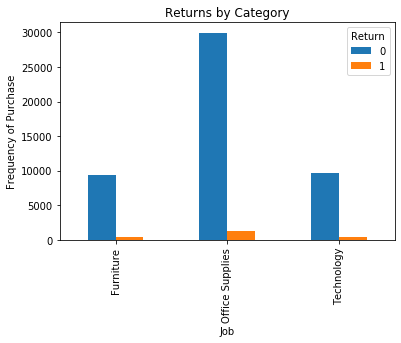

In [130]:
%matplotlib inline
pd.crosstab(df.Category,df.Return).plot(kind='bar')
plt.title('Returns by Category')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

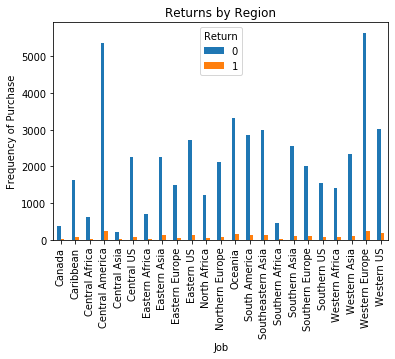

In [132]:
%matplotlib inline
pd.crosstab(df.Region,df.Return).plot(kind='bar')
plt.title('Returns by Region')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

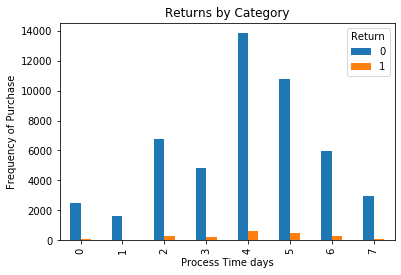

In [134]:
%matplotlib inline
pd.crosstab(df.ProcessTime,df.Return).plot(kind='bar')
plt.title('Returns by Category')
plt.xlabel('Process Time days')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

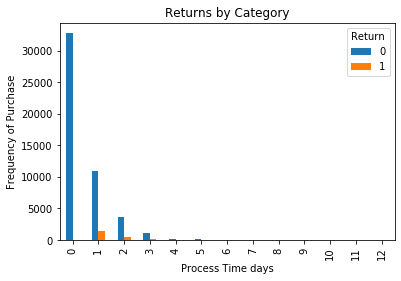

In [139]:
%matplotlib inline
pd.crosstab(df.Count,df.Return).plot(kind='bar')
plt.title('Returns by Category')
plt.xlabel('Process Time days')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

In [126]:
df1.columns

Index(['ProcessTime', 'Region', 'Customer', 'Segment', 'Product', 'Category',
       'SubCategory', 'Quantity', 'Discount', 'Priority', 'Return', 'Count'],
      dtype='object')

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [96]:
import pandas as pd
from sklearn import linear_model, discriminant_analysis, naive_bayes

logit = linear_model.LogisticRegression()
LDA  = discriminant_analysis.LinearDiscriminantAnalysis()
QDA  = discriminant_analysis.QuadraticDiscriminantAnalysis()
GNB  = naive_bayes.GaussianNB()
MNB  = naive_bayes.MultinomialNB()
BNB  = naive_bayes.BernoulliNB(binarize=1.5)

modelList = [logit, LDA, QDA, GNB, MNB, BNB]
modelSeries = pd.Series(modelList, index=['Logitistic', 'LDA', 'QDA', 'GNB', 'MNB', 'BNB'])



modelSeries.apply(lambda t:t.fit(X_train, y_train))

/Users/fargnoli/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logitistic    LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n                   intercept_scaling=1, l1_ratio=None, max_iter=100,\n                   multi_class='auto', n_jobs=None, penalty='l2',\n                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,\n                   warm_start=False)
LDA           LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,\n                           solver='svd', store_covariance=False, tol=0.0001)                                                                                                                                                                                 
QDA           QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,\n                              store_covariance=False, tol=0.0001)                                                                                                                                                                              

In [97]:
ans = modelSeries.apply(lambda t:pd.Series([t.score(X_train, y_train), t.score(X_test, y_test)]))
ans.columns = ['train score', 'test score']
ans

,train score,test score
Logitistic,0.953280,0.955644
LDA,0.948114,0.949698
QDA,0.948089,0.949698
GNB,0.948138,0.949698
MNB,0.707302,0.705108
BNB,0.956278,0.958471


In [116]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
LF = LogisticRegression()
model=LF.fit(X_train,y_train)




from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train,y_train, cv=5)

/Users/fargnoli/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/fargnoli/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

array([0.95418545, 0.95296698, 0.95417987, 0.95332683, 0.9534487 ])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc894241cd0>,
      dtype=object)

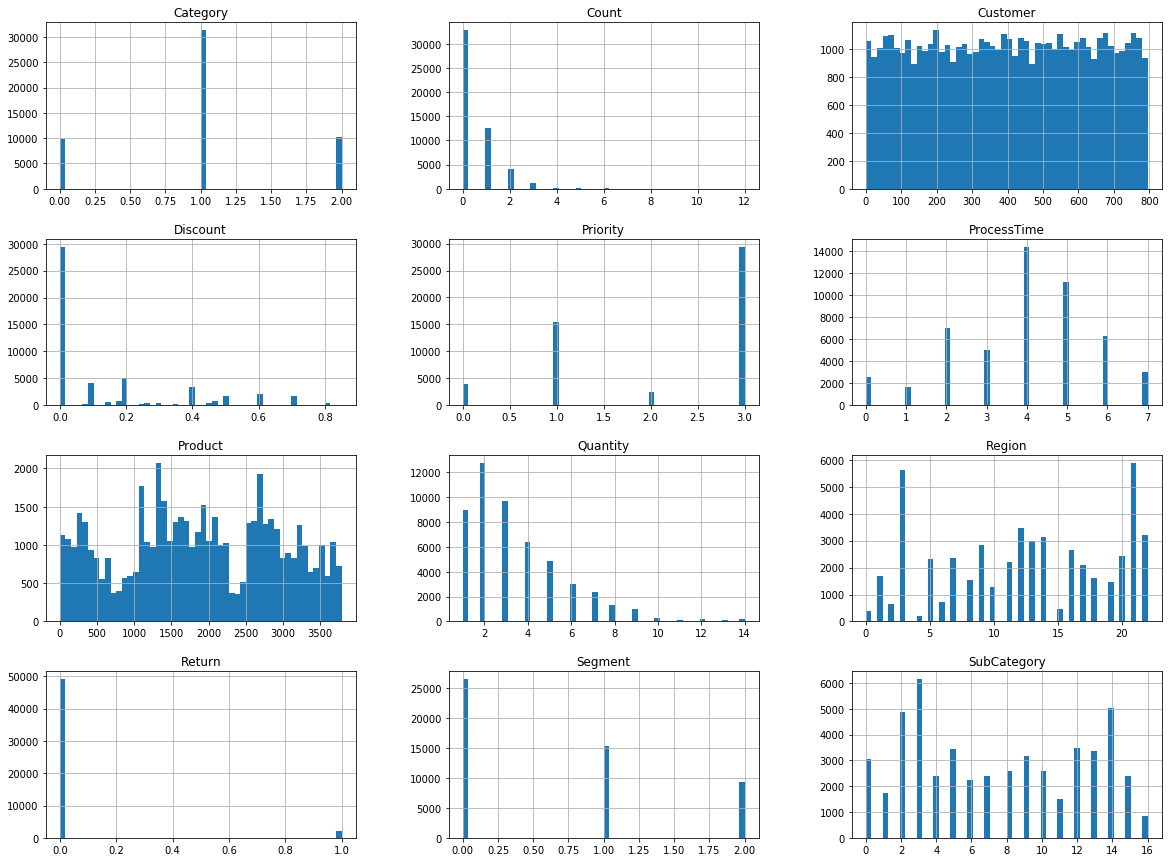

In [103]:
df1.hist(bins=50, figsize=(20,15))

In [119]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.177035
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.014     
Dependent Variable: Return           AIC:              14550.1827
Date:               2020-07-09 05:47 BIC:              14645.0259
No. Observations:   41032            Log-Likelihood:   -7264.1   
Df Model:           10               LL-Null:          -7369.2   
Df Residuals:       41021            LLR p-value:      1.1372e-39
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
ProcessTime  -0.1298    0.0146   -8.8758  0.0000  -0.1585  -0.1011
Region       -0.0315    0.0033   -9.4418  0.0000  -0.0381  -0.

In [120]:
model=LF.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


/Users/fargnoli/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [121]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9803   29]
 [ 426    0]]


In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      9832
           1       0.00      0.00      0.00       426

    accuracy                           0.96     10258
   macro avg       0.48      0.50      0.49     10258
weighted avg       0.92      0.96      0.94     10258



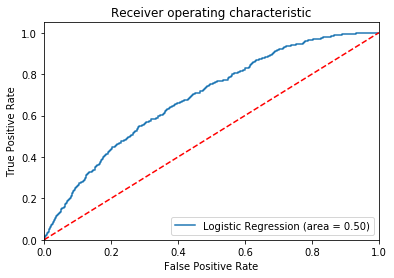

In [125]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()